In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [21]:
O3_all = pd.read_csv("../Data/real_events_O3_ALL.csv")
O4_all = pd.read_csv("../Data/real_events_O4_ALL.csv")

In [31]:
print(len(O3_all), ": O3")
print(len(O4_all), ": O4")

55 : O3
53 : O4


In [ ]:
# figure out what the coalescence phase is 
# move neutron star data into different dataset 

In [ ]:
# make a flag for neutron stars (maybe give them a different colors) so that we can compare BOTH BBH and BNS events between O3 and O4

# maybe also try looking for BH/NS mergers (have any happended in this data?)

In [47]:
#keep = ["chirp_mass", "mass1", "mass2", "spin1z", "spin2z", "snr"]
keep = ["template_duration", "coalescence_phase", "combined_far", "coalescence_phase", "combined_far"]
O3_all_reduced = O3_all[keep]
O4_all_reduced = O4_all[keep]
# Removed : , 

In [46]:
O4_all

,chirp_mass,false_alarm_rate,combined_far,mass1,mass2,snr,spin1z,spin2z,Gamma0,Gamma1,end_time,template_duration,chisq,likelihood,sigmasq,coalescence_phase,bank_chisq,eventid
0,38.758006,8.081394e-03,1.529479e-09,70.349213,29.247704,6.690365,-0.170156,-0.170156,1805247.0,915.0,1380810339,17.000000,0.867471,18.156550,1.065724e+09,-2.923299,0.947826,S231008ap
1,33.396088,1.053529e-02,2.045329e-09,36.045074,40.860004,6.339120,-0.139219,-0.139219,1803325.0,911.0,1380532567,17.000000,0.992163,17.730073,1.047073e+09,-1.154354,1.218451,S231005ah
2,93.016832,1.540849e-01,3.215670e-08,106.848280,106.848280,5.958428,-0.773438,-0.773438,1813882.0,918.0,1380507048,33.000000,0.778432,15.220956,3.042835e+09,-0.068327,0.594579,S231005j
3,32.302959,2.475862e-02,4.965728e-09,137.300630,12.678712,7.523421,0.108281,0.108281,1802816.0,912.0,1380204158,17.000000,1.258758,17.150057,2.513206e+08,-2.938160,1.442420,S231001aq
4,41.086045,3.653614e-02,7.380468e-09,54.746231,40.860004,5.923171,-0.077344,-0.077344,1806044.0,914.0,1380107268,17.000000,0.942930,16.246696,1.417229e+09,2.849006,0.909085,S230930al
5,54.937890,0.000000e+00,9.502638e-10,95.854675,42.877823,7.185654,0.403167,0.403167,31743.0,NaN,1379973525,0.206417,0.897808,0.000000,2.600070e+09,0.616597,NaN,S230928cb
6,20.131023,0.000000e+00,3.167546e-10,27.153339,19.791698,16.292339,0.048577,0.048577,45630.0,NaN,1379864330,1.080085,1.164731,0.000000,5.731902e+08,2.998215,NaN,S230927be
7,41.256714,0.000000e+00,1.075002e-08,59.432453,38.159775,8.795760,0.015339,0.096946,0.0,0.0,1379824667,0.917429,0.972949,0.000000,0.000000e+00,1.442107,0.000000,S230927l
8,30.012838,0.000000e+00,3.167546e-10,38.549595,30.907524,8.720570,-0.066435,-0.066435,31559.0,NaN,1379594711,0.492545,1.256697,0.000000,1.045132e+09,-1.770143,NaN,S230924an
9,31.825009,0.000000e+00,3.607753e-10,154.342350,11.374117,9.523216,-0.121152,-0.121152,132445.0,NaN,1379390836,0.180810,1.132807,0.000000,1.927669e+08,0.641449,NaN,S230922q


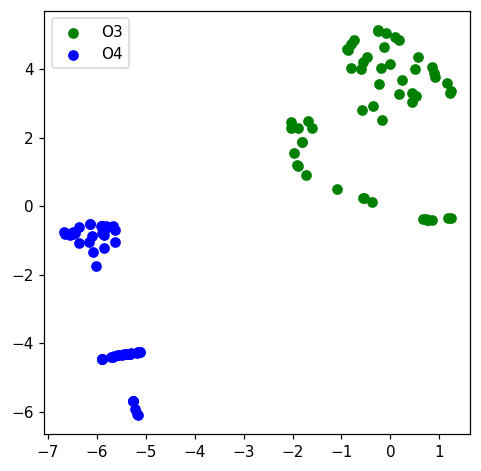

In [48]:
# Creating the TSNE algorithm :
tsne_O3 = TSNE(n_components=2, random_state=42)

# The random_state argument is a seed for the random number generator (?)
# Setting random_state to a fixed value allows for reproducability (?)

# Applying the O3 data to the TSNE algorithm created : 
X_tsne_O3 = tsne_O3.fit_transform(O3_all_reduced)

# This creates a 2 - dimensional df that will later be used for plotting

tsne_O4 = TSNE(n_components=2, random_state=42)
X_tsne_O4 = tsne_O4.fit_transform(O4_all_reduced)

fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)

scatter_O3 = ax.scatter(X_tsne_O3[:, 0], X_tsne_O3[:, 1],color = "green", label="O3")

scatter_O4 = ax.scatter(X_tsne_O4[:, 0], X_tsne_O4[:, 1], color = "blue",label="O4")


ax.legend()
plt.show()

In [ ]:
# Mark/flag this data with (numbers/colors (as done this summer))? so 

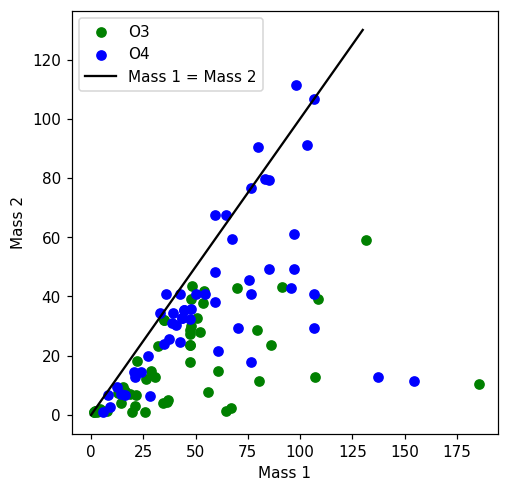

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)
ax.scatter(O3_all["mass1"], O3_all["mass2"], color = "green", label = "O3")
ax.scatter(O4_all["mass1"], O4_all["mass2"], color = "blue", label = "O4")
x = np.linspace(0,130,100)
ax.plot(x, x, color="black", label="Mass 1 = Mass 2")
ax.set_xlabel("Mass 1")
ax.set_ylabel("Mass 2")
ax.legend()

In [ ]:
# Maybe get a best fit between 

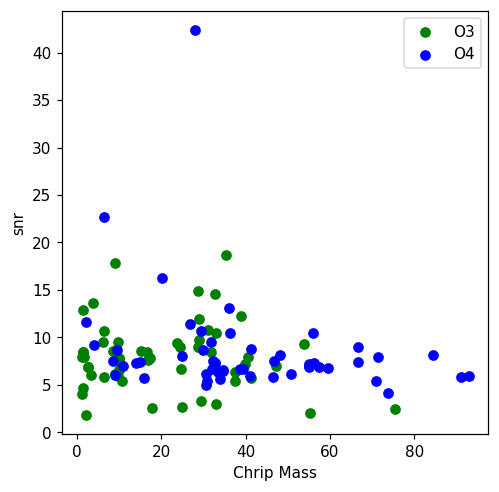

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)
ax.scatter(O3_all["chirp_mass"], O3_all["snr"], color = "green", label = "O3")
ax.scatter(O4_all["chirp_mass"], O4_all["snr"], color = "blue", label = "O4")
x = np.linspace(0,130,100)

ax.set_xlabel("Chrip Mass")
ax.set_ylabel("snr")
ax.legend()

Text(0, 0.5, 'snr')

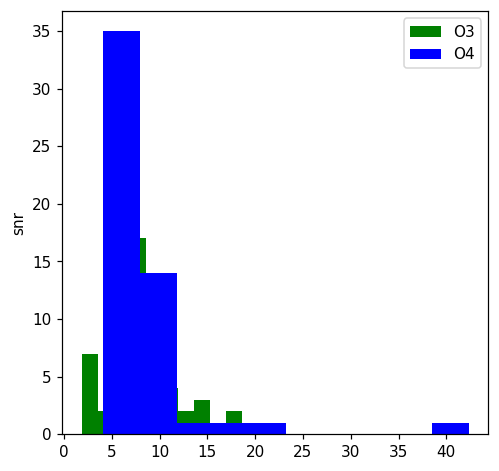

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)
ax.hist(O3_all["snr"], color = "green", label = "O3")
ax.hist(O4_all["snr"], color = "blue", label = "O4")
ax.legend()
ax.set_ylabel("snr")

Text(0, 0.5, 'Template Duration')

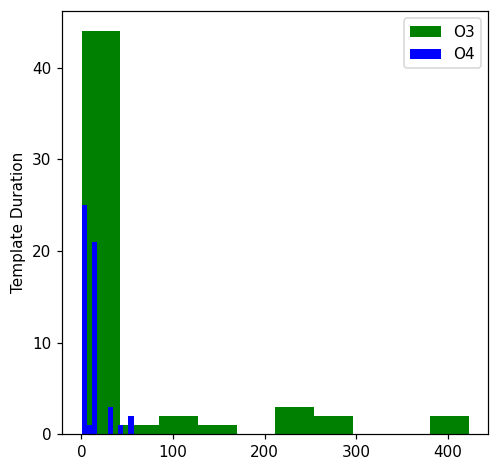

In [44]:
# Use a specific bin size so that these plots can be comparable !

fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)
ax.hist(O3_all["template_duration"], color = "green", label = "O3")
ax.hist(O4_all["template_duration"], color = "blue", label = "O4")
ax.legend()
ax.set_ylabel("Template Duration")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)
ax.scatter(O3_all["chirp_mass"], O3_all["snr"], color = "green", label = "O3")
ax.scatter(O4_all["chirp_mass"], O4_all["snr"], color = "blue", label = "O4")
x = np.linspace(0,130,100)

ax.set_xlabel("Chrip Mass")
ax.set_ylabel("snr")
ax.legend()

In [ ]:
# Ask Kaitlyn to work with this lumiinosity distance (how do we get these values from the data we have?)

$$d_L = 45 \text{ Gpc} \left( \frac{\text{Hz}}{f_{\text{GW}\mid_{\text{max}}}}\right)\left( \frac{10^{-21}}{h\mid_{\text{max}}}\right)$$

Above is the formula for luminosity distance given in https://arxiv.org/pdf/1608.01940.pdf (equation 22). We can get the max frequency but I don't know how we'd find the maximum strain. Would we have to take it off a plot? It doesn't seem to be given in the GraceDB data.

$$\chi_{\text{eff}} = \frac{\vec{S_1}/m_1+\vec{S_2}/m_2}{m_1+m_2} \cdot \hat{L}$$

In [71]:
# Example of how this would be coded (for each row in a dataframe)... would need to update this... still dependent on previous code
def x_eff(dataframe):
    for x in range(len(dataframe)):
        x_eff_vals = ((dataframe.at[x, "spin1z"] / dataframe.at[x, "mass1"]) + (dataframe.at[x, "spin2z"] / dataframe.at[x, "mass2"])) / ((dataframe.at[x, "mass1"]) + (dataframe.at[x, "mass2"]))
        dataframe.at[x, 'x_eff'] = x_eff_vals